# EECS 469/569: Homework 3 Submission
## Multi-Node Performance of Roaring Thunder
### Due: Tuesday, Nov. 1 *before* midnight

(Optional this time) [Sign-up for a grading period here.](https://doodle.com/meeting/participate/id/ejqXYGzd)

## Name 1:
## Name 2: 
## Name 3:

## Checklist

0. [Other Deliverables](#Other-Deliverables)
    0. Sign up for grading slot (Optional, but encouraged)
    1. Email team to Dr. Hansen
    2. Write a couple of paragraphs on main takeaways and how you worked together
1. [MPI Overhead](#1.-MPI-Overhead)
    1. ping pong overhead (single node, two nodes)
    2. collective communication overhead
2. [MPI I/O](#2.-MPI-I/O)
    1. MPI write speed
    2. MPI read speed
3. [MPI Linear Algebra](#3.-MPI-Linear-Algebra)
    1. matrix-multiply speedup
    2. matrix-vector and dot-product speedup
4. [Other MPI Accelerations](#4.-Other-MPI-Accelerations)
    1. description of your solved problem and how you solved it, discussion of another group

### Submission Instructions

Follow all instructions within `hw03.ipynb`. To submit the homework assignment, put **only relevant files (including this notebook)** in a folder. Zip the folder (e.g., using [7-zip](https://www.7-zip.org/)) and send one email to Dr. Hansen (CC your partner) with the zipped folder. **Do not include the benchmark files, they are not relevant.** Print a .pdf of this (completed) Jupyter notebook and submit it to D2L before the deadline (`CTRL+P` $\rightarrow$ `Save as PDF` in Google Chrome). 

It is your responsibility that all of the figures, plots, source code, etc. properly appear in the submitted notebook **and .pdf**. 

## Other Deliverables

$\mathbf{\infty}$**.1 FIRST DELIVERABLE (-5 points if not on time):** ***By class on Monday, Oct. 17,*** email Dr. Hansen (CC your group) who you will be working with for this homework. 

$\mathbf{\infty}$**.2 FINAL DELIVERABLE (3 points):** ***After*** you have completed the entire assignment, write a few paragraphs on your main takeaways from the assignment. **Clearly state** how the work was split up between each of your group members. 

## 1. MPI Overhead

### Required SLURM Batch Submissions:
* pingpong with 1 node 2 processes
* pingpong with 2 nodes 1 process per node
* collectives with 4 nodes and 32 processes per node

**Datasets:** link your datasets here with a couple word description of each:
* [example link](serial_sort.c)
* 

**1.1 DELIVERABLE (8 points):** Collect the output of the pingpong into a .csv file (or other data format to be used for plotting). You will need the following: number of Bytes, MBytes/sec. Plot two lines on the same graph:
1. pingpong on one node, MBytes/s (y-axis) vs. Bytes (x axis)
2. pingpong on two nodes, MBytes/s vs. Bytes

Be sure to add a legend and clearly identify which line is which. Discuss the difference in results for the pingpong benchmark for the two cases. What is different between the two cases, and why does that impact the transfer speed? 

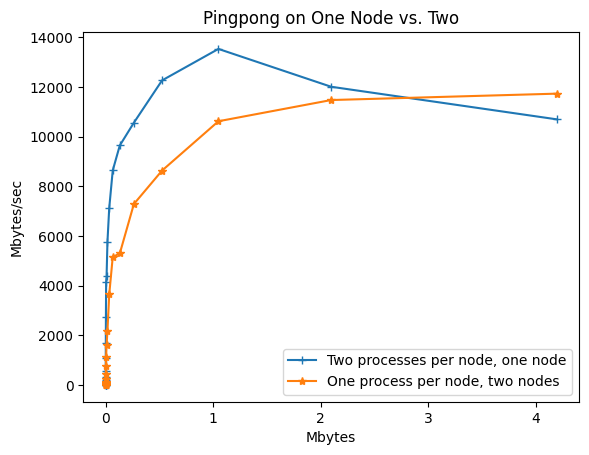

In [14]:
# plot of pingpong MBytes/s vs Bytes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_n1p2 = pd.read_csv("n1p2_pp.csv")
dataFrame_n2p1 = pd.read_csv("n2p1_pp.csv")

#plot
plt.plot(dataFrame_n1p2['#bytes']/(1e6),dataFrame_n1p2['Mbytes/sec'], marker='+', label = "Two processes per node, one node")
plt.plot(dataFrame_n2p1['#bytes']/(1e6),dataFrame_n2p1['Mbytes/sec'], marker='*', label = "One process per node, two nodes")
plt.xlabel('Mbytes')
plt.ylabel('Mbytes/sec')
plt.legend()
plt.title("Pingpong on One Node vs. Two")
plt.show()


**Discussion:**

**1.2 DELIVERABLE (12 points):** Create three figures:
1. two line plots for two benchmarks: overhead \[t_avg\] vs. number of processes
2. one line plot for one benchmark: overhead \[t_avg\] vs. number of Bytes
3. eight box-whiskers (one for each benchmark) comparing the overhead of each collective communication. 
    * you can approximate the true dataset by using a Normal distribution with mean \[t_avg\] and std. dev. $(t_{max}-t_{min})/4$.
    
For the collective communication operations, discuss how they compare in terms of communication overhead. Spend time discussing how each scale as a function of the number of processes, as well as the size of the message. Do you notice anything in particular as the messages go across nodes? 

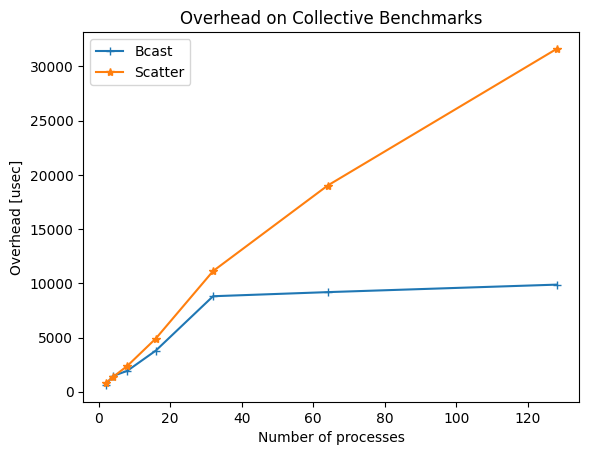

In [18]:
# plot overhead for two benchmarks here

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_bcast = pd.read_csv("bcast.csv")
dataFrame_scatter = pd.read_csv("scatter.csv")

#plot
plt.plot(dataFrame_bcast['proc'],dataFrame_bcast['t_avg[usec]'], marker='+', label = "Bcast")
plt.plot(dataFrame_scatter['proc'],dataFrame_scatter['t_avg[usec]'], marker='*', label = "Scatter")
plt.xlabel('Number of processes')
plt.ylabel('Overhead [usec]')
plt.legend()
plt.title("Overhead on Collective Benchmarks")
plt.show()

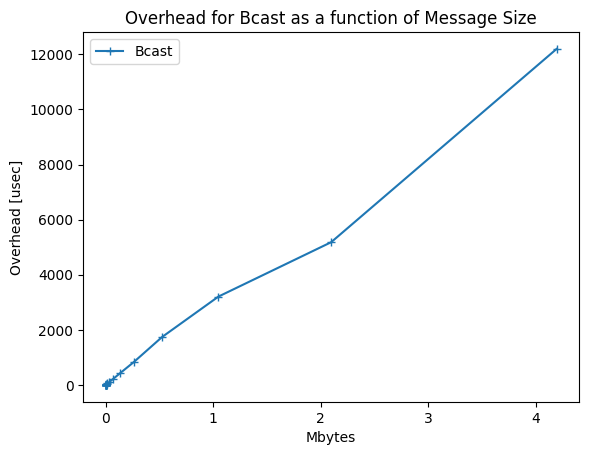

In [22]:
# plot the overhead for one benchmark here as a function of message size

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_bcast128 = pd.read_csv("bcast_128.csv")

#plot
plt.plot(dataFrame_bcast128['#bytes']/(1e6),dataFrame_bcast128['t_avg[usec]'], marker='+', label = "Bcast")
plt.xlabel('Mbytes')
plt.ylabel('Overhead [usec]')
plt.legend()
plt.title("Overhead for Bcast as a function of Message Size")
plt.show()

Text(0.5, 1.0, 'Average Overhead for different MPI Collectives')

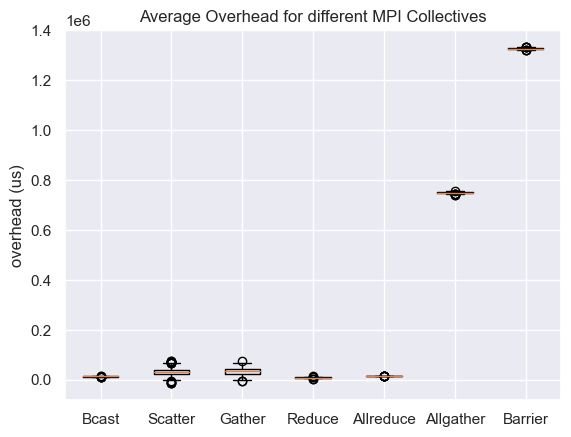

In [39]:
# plot the box-whiskers plot here

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()

#get random number generator from numpy
rng = np.random.default_rng()

#create a dataframes
dataFrame_allcollective = pd.read_csv("all_128.csv")

#defining min, maxes, and averages
bcast_min = dataFrame_allcollective["t_min[usec]"][0]
scatter_min = dataFrame_allcollective["t_min[usec]"][1]
gather_min = dataFrame_allcollective["t_min[usec]"][2]
reduce_min = dataFrame_allcollective["t_min[usec]"][3]
allreduce_min = dataFrame_allcollective["t_min[usec]"][4]
allgather_min = dataFrame_allcollective["t_min[usec]"][5]
barrier_min = dataFrame_allcollective["t_min[usec]"][6]

bcast_max = dataFrame_allcollective["t_max[usec]"][0]
scatter_max = dataFrame_allcollective["t_max[usec]"][1]
gather_max = dataFrame_allcollective["t_max[usec]"][2]
reduce_max = dataFrame_allcollective["t_max[usec]"][3]
allreduce_max = dataFrame_allcollective["t_max[usec]"][4]
allgather_max = dataFrame_allcollective["t_max[usec]"][5]
barrier_max = dataFrame_allcollective["t_max[usec]"][6]

bcast_avg = dataFrame_allcollective["t_avg[usec]"][0]
scatter_avg = dataFrame_allcollective["t_avg[usec]"][1]
gather_avg = dataFrame_allcollective["t_avg[usec]"][2]
reduce_avg = dataFrame_allcollective["t_avg[usec]"][3]
allreduce_avg = dataFrame_allcollective["t_avg[usec]"][4]
allgather_avg = dataFrame_allcollective["t_avg[usec]"][5]
barrier_avg = dataFrame_allcollective["t_avg[usec]"][6]

bcast_stdev = (bcast_max - bcast_min)/4
scatter_stdev = (scatter_max-scatter_min)/4
gather_stdev = (gather_max-gather_min)/4
reduce_stdev = (reduce_max-reduce_min)/4
allreduce_stdev = (allreduce_max-allreduce_min)/4
allgather_stdev = (allgather_max-allgather_min)/4
barrier_stdev = (barrier_max-barrier_min)/4

y_bcast = rng.normal(bcast_avg,bcast_stdev, size = 1000)
y_scatter = rng.normal(scatter_avg,scatter_stdev,size=1000)
y_gather = rng.normal(gather_avg,gather_stdev,size=1000)
y_reduce = rng.normal(reduce_avg,reduce_stdev,size=1000)
y_allreduce = rng.normal(allreduce_avg,allreduce_stdev,size=1000)
y_allgather = rng.normal(allgather_avg,allgather_stdev,size=1000)
y_barrier = rng.normal(barrier_avg,barrier_stdev,size=1000)


names = ['Bcast','Scatter','Gather','Reduce','Allreduce','Allgather','Barrier']

plt.boxplot([y_bcast,y_scatter,y_gather,y_reduce,y_allreduce,y_allgather,y_barrier],labels=names)
plt.ylabel('overhead (us)')
plt.title("Average Overhead for different MPI Collectives")

**discussion:**

## 2. MPI I/O
### Required SLURM Batch Submissions:
* MPI Write (5 each): P = 2, 4, 8, 16, 32, 64
* MPI Read (5 each): P = 2, 4, 8, 16, 32, 64

**Code and Datasets:** link your code and datasets here with a couple word description of each:
* [example link](serial_sort.c)
* 

**2.1 DELIVERABLE:** Plot the average write speed (MB/s or other SI prefix) vs. P. Analyze and discuss your results (2-3 sentences). 

**Discussion:** 

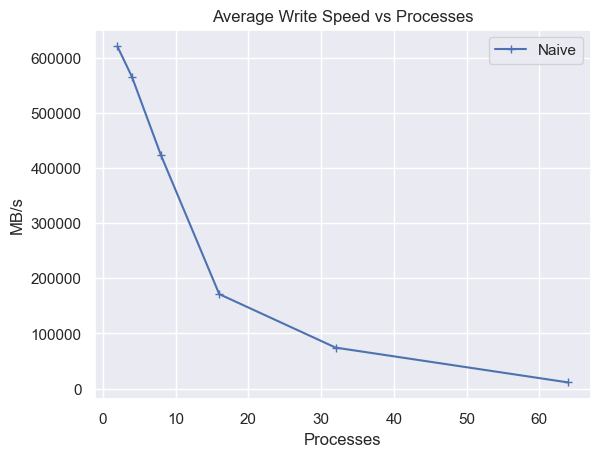

In [48]:
# plot average write speed vs. P

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframes
dataFrame_write = pd.read_csv("mpi_write.csv")

#group the data by processes
averages_write = dataFrame_write.groupby('P',as_index=False)['MB/s'].mean()


#plot
plt.plot(averages_write['P'],averages_write['MB/s'], marker='+', label = "Naive")
plt.xlabel('Processes')
plt.ylabel('MB/s')
plt.legend()
plt.title("Average Write Speed vs Processes")
plt.show()

**2.2 DELIVERABLE:** Plot the average read speed (MB/s or other SI prefix) vs. P. Analyze and discuss your results (2-3 sentences). 

**Discussion:** 

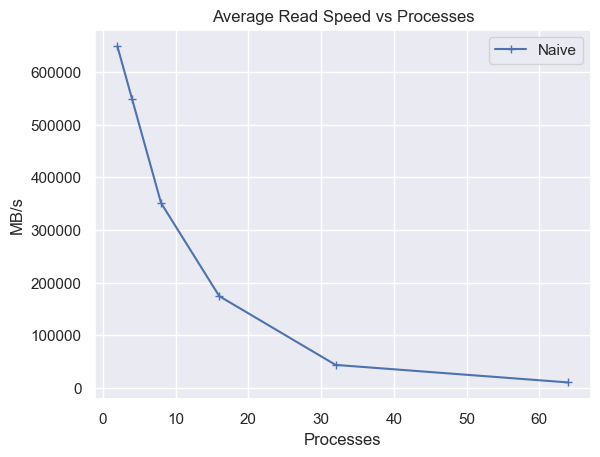

In [47]:
# plot average read speed vs. P


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframes
dataFrame_read = pd.read_csv("mpi_read.csv")

#group the data by processes
average_read = dataFrame_read.groupby('P',as_index=False)['MB/s'].mean()


#plot
plt.plot(average_read['P'],average_read['MB/s'], marker='+', label = "Naive")
plt.xlabel('Processes')
plt.ylabel('MB/s')
plt.legend()
plt.title("Average Read Speed vs Processes")
plt.show()

**2.3 DELIVERABLE:** Create a box-whiskers plot that compares the read/write speed of the cluster for the $P$ that had the highest performance (make sure that each has the same $P$). Add two additional box-whiskers for the sequential read/write results that you obtained in HW1.  

What are the key takeaways of parallel I/O vs. serial I/O? 

**Discussion:**

Text(0.5, 1.0, 'Read/Write Speeds in Parallel vs Serial')

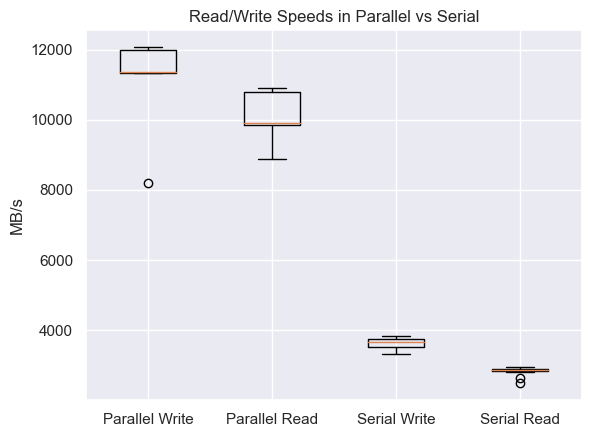

In [11]:
# plot box-whiskers here

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()

#create a dataframes
dataFrame_mpi_write = pd.read_csv("mpi_write.csv")
dataFrame_mpi_read = pd.read_csv("mpi_read.csv")
dataFrame_serial_write = pd.read_csv("fwrite_new.csv")
dataFrame_serial_read = pd.read_csv("fread_new.csv")

mpi_write = np.array(dataFrame_mpi_write["MB/s"].tolist()[25:30])
mpi_read = np.array(dataFrame_mpi_read["MB/s"].tolist()[25:30])
serial_write = np.array(dataFrame_serial_write["MB/s"].tolist()[80:90])
serial_read = np.array(dataFrame_serial_read["MB/s"].tolist()[80:90])

names = ['Parallel Write','Parallel Read','Serial Write','Serial Read']
plt.boxplot([mpi_write,mpi_read,serial_write,serial_read],labels=names)
plt.ylabel('MB/s')
plt.title("Read/Write Speeds in Parallel vs Serial")

## 3. MPI Linear Algebra
### Required SLURM Batch Submissions:
* Matrix-Matrix Multiply, $N=4096$ (5 each): $P=4,16$
    * (20 times) $P=64$
* Matrix-Vector Product (5 each): $P = {1,2,4,8,16,32}$
    * (20 times) $P=64$
* Dot Product (5 each): $P = {1,2,4,8,16,32}$
    * (20 times) $P=64$

**Code and Datasets:** link your code and datasets here with a couple word description of each:
* [example link](serial_sort.c)
* 

**3.1 DELIVERABLE:** Create three figures that have $P$ on the x-axis, and on the y-axis:
* average parallel speedup (Use a $T=1$ time from Homework 1 or 2 from the serial version of the matmul code.)
* average floating point operations per second (FLOPs)
* average execution time

***USE AN APPROPRIATE SI PREFIX FOR YOUR Y-AXES!*** 

**BONUS (5 points)**: extend your method to not need a square power-of-2 number of processes and also analyze $P=8,32,80$

Discuss in a few sentences per figure the impact of MPI and the number of processes on algorithm performance. ***WHY*** do you think you are seeing the results you are? 

**Discussion:**

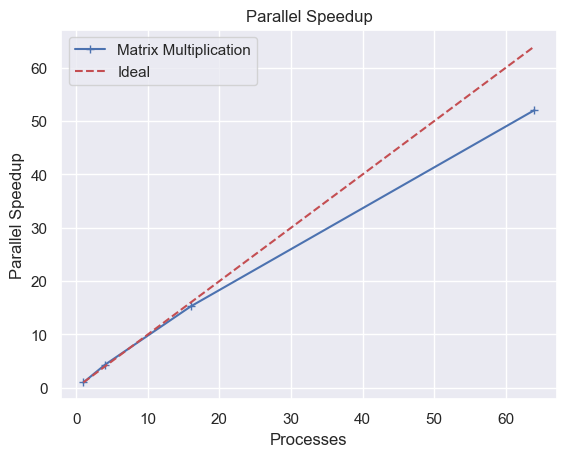

In [32]:
#plot average parallel speedup versus P

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_mat_mat = pd.read_csv("mpi_matrix_multiply.csv")

#group the data by N
groups_mat_mat = dataFrame_mat_mat.groupby(' P',as_index=False)[' s']

#average each group
averages = groups_mat_mat.mean()

sequential_time = np.array(averages[" s"].tolist()[0:1])
parallel_times = np.array(averages[" s"].tolist()[0:4])

parallel_speedup = sequential_time/parallel_times
threads = [1, 4, 16, 64]

#plot
plt.plot(threads,parallel_speedup, marker='+', label = "Matrix Multiplication")
plt.plot(threads,threads, 'r--', label = "Ideal")
plt.xlabel('Processes')
plt.ylabel('Parallel Speedup')
plt.legend()
plt.title("Parallel Speedup")
plt.show()

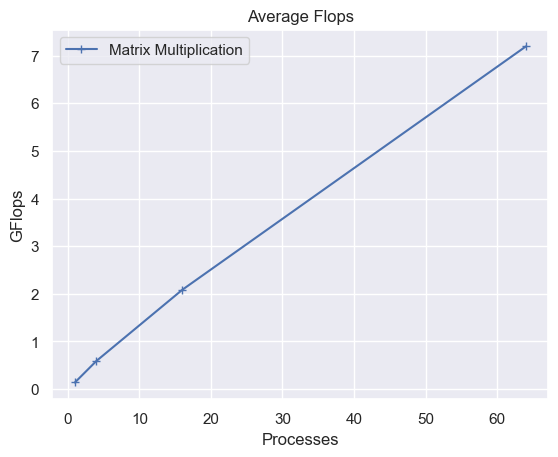

In [30]:
#plot average FLOPs versus P

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_mat_mat = pd.read_csv("mpi_matrix_multiply.csv")

#group the data by N
groups_mat_mat = dataFrame_mat_mat.groupby(' P',as_index=False)[' Flops']

#average each group
averages = groups_mat_mat.mean()

Flops = np.array(averages[" Flops"].tolist()[0:4])/(1e9)
threads = np.array(averages[" P"].tolist()[0:4])


#plot
plt.plot(threads,Flops, marker='+', label = "Matrix Multiplication")
plt.xlabel('Processes')
plt.ylabel('GFlops')
plt.legend()
plt.title("Average Flops")
plt.show()

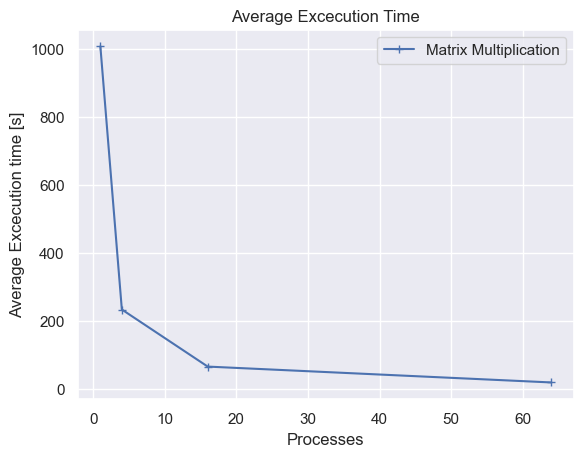

In [31]:
#plot average execution time versus P

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_mat_mat = pd.read_csv("mpi_matrix_multiply.csv")

#group the data by N
groups_mat_mat = dataFrame_mat_mat.groupby(' P',as_index=False)[' s']

#average each group
averages = groups_mat_mat.mean()

Flops = np.array(averages[" s"].tolist()[0:4])
threads = np.array(averages[" P"].tolist()[0:4])


#plot
plt.plot(threads,Flops, marker='+', label = "Matrix Multiplication")
plt.xlabel('Processes')
plt.ylabel('Average Excecution time [s]')
plt.legend()
plt.title("Average Excecution Time")
plt.show()

**3.2 DELIVERABLE:** Create two figures that show the scaling of OpenMP versus MPI with $P$ (or $T$) on the x-axis, and on the y-axis:
1. one plot each for OpenMP/MPI with parallel speedup (**include the ideal speedup as a third plot**)
2. one plot each for OpenMP/MPI with FLOPs

Discuss how the two parallel frameworks scale. 

**Discussion:**

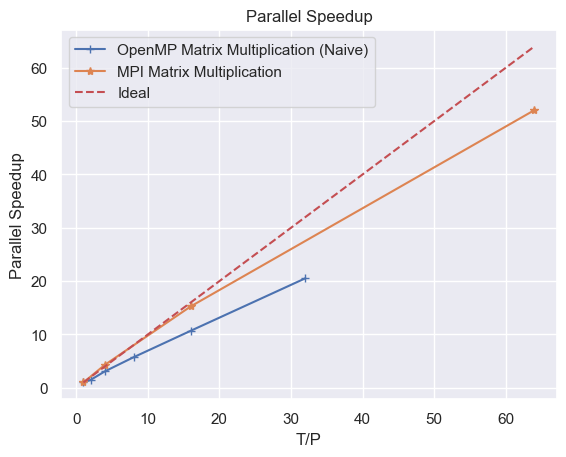

In [50]:
#plot MPI and OpenMP: average parallel speedup versus P/T (include ideal speedup) WITH legend

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_openmp = pd.read_csv("matrix_multiply_serial_naive.csv")
dataFrame_mpi = pd.read_csv("mpi_matrix_multiply.csv")

#group the data by N
groups_openmp = dataFrame_openmp.groupby('T',as_index=False)['s']
groups_mpi = dataFrame_mpi.groupby(' P',as_index=False)[' s']

#average each group
averages_openmp = groups_openmp.mean()
averages_mpi = groups_mpi.mean()

#print(averages_openmp)

seq_openmp = np.array(averages_openmp["s"].tolist()[0:1])
par_openmp = np.array(averages_openmp["s"].tolist()[0:6])
seq_mpi = np.array(averages_mpi[" s"].tolist()[0:1])
par_mpi = np.array(averages_mpi[" s"].tolist()[0:7])

ps_openmp = seq_openmp/par_openmp
threads_openmp = np.array(averages_openmp["T"].tolist()[0:6])

ps_mpi = seq_mpi/par_mpi
threads_mpi = np.array(averages_mpi[" P"].tolist()[0:7])

#plot
plt.plot(threads_openmp,ps_openmp, marker='+', label = "OpenMP Matrix Multiplication (Naive)")
plt.plot(threads_mpi,ps_mpi, marker='*', label = "MPI Matrix Multiplication")
plt.plot(threads_mpi,threads_mpi, 'r--', label = "Ideal")
plt.xlabel('T/P')
plt.ylabel('Parallel Speedup')
plt.legend()
plt.title("Parallel Speedup")
plt.show()

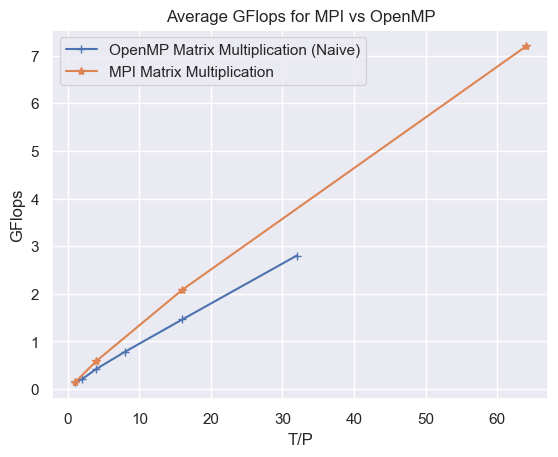

In [51]:
#plot MPI and OpenMP: average FLOPs versus P/T WITH legend

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_openmp = pd.read_csv("matrix_multiply_serial_naive.csv")
dataFrame_mpi = pd.read_csv("mpi_matrix_multiply.csv")

#group the data by N
groups_openmp = dataFrame_openmp.groupby('T',as_index=False)['Flops']
groups_mpi = dataFrame_mpi.groupby(' P',as_index=False)[' Flops']

#average each group
averages_openmp = groups_openmp.mean()
averages_mpi = groups_mpi.mean()

#print(averages_openmp)

flops_openmp = np.array(averages_openmp["Flops"].tolist()[0:6])/(1e9)
flops_mpi = np.array(averages_mpi[" Flops"].tolist()[0:7])/(1e9)

threads_openmp = np.array(averages_openmp["T"].tolist()[0:6])
threads_mpi = np.array(averages_mpi[" P"].tolist()[0:7])

#plot
plt.plot(threads_openmp,flops_openmp, marker='+', label = "OpenMP Matrix Multiplication (Naive)")
plt.plot(threads_mpi,flops_mpi, marker='*', label = "MPI Matrix Multiplication")
plt.xlabel('T/P')
plt.ylabel('GFlops')
plt.legend()
plt.title("Average GFlops for MPI vs OpenMP")
plt.show()

**3.3 DELIVERABLE:** 

Create two figures that have $P$ on the x-axis (including $T=1$), and on the y-axis:
1. average parallel speedup versus the sequential time (plot the ideal speedup on the same graph)
2. average floating point operations per second (FLOPs)

Each figure should have three plots: one for the dot product, one for the matrix-vector product, and one for the matrix-matrix product. The two plots should have distinct colors and lines (e.g., solid verus dashed). Add a legend that clearly identifies which plot is which. 

Create a box-whiskers plot that shows the FLOPs performance compared between the matrix-matrix product, matrix-vector product, and dot-product for $P=64$. **Include both the MPI and OpenMP ($T=32$) results.** Discuss the results and make note of the performance between the OpenMP and MPI.

**Discussion:**

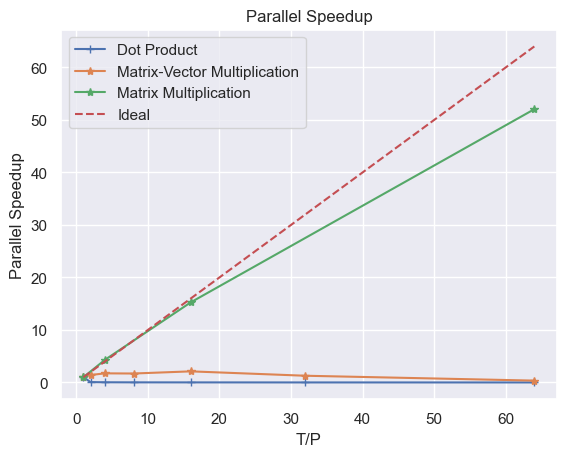

In [66]:
# average parallel speedup versus the sequential time (plot the ideal speedup on the same graph)
# three plots: one for the dot product, one for the matrix-vector product, and one for the matrix-matrix product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_dot = pd.read_csv("mpi_dot_product.csv")
dataFrame_vec = pd.read_csv("mpi_matrix_vector.csv")
dataFrame_mat = pd.read_csv("mpi_matrix_multiply.csv")

#group the data by N
groups_dot = dataFrame_dot.groupby(' P',as_index=False)[' s']
groups_vec = dataFrame_vec.groupby(' P',as_index=False)[' s']
groups_mat = dataFrame_mat.groupby(' P',as_index=False)[' s']

#average each group
averages_dot = groups_dot.mean()
averages_vec = groups_vec.mean()
averages_mat = groups_mat.mean()

#print(averages_mat)

seq_dot = np.array(averages_dot[" s"].tolist()[0:1])
par_dot = np.array(averages_dot[" s"].tolist()[0:7])
seq_vec = np.array(averages_vec[" s"].tolist()[0:1])
par_vec = np.array(averages_vec[" s"].tolist()[0:7])
seq_mat = np.array(averages_mat[" s"].tolist()[0:1])
par_mat = np.array(averages_mat[" s"].tolist()[0:4])

ps_dot = seq_dot/par_dot
ps_vec = seq_vec/par_vec
ps_mat = seq_mat/par_mat

threads_dot = np.array(averages_dot[" P"].tolist()[0:7])
threads_vec = np.array(averages_vec[" P"].tolist()[0:7])
threads_mat = np.array(averages_mat[" P"].tolist()[0:4])

#plot
plt.plot(threads_dot,ps_dot, marker='+', label = "Dot Product")
plt.plot(threads_vec,ps_vec, marker='*', label = "Matrix-Vector Multiplication")
plt.plot(threads_mat,ps_mat, marker='*', label = "Matrix Multiplication")
plt.plot(threads_mat,threads_mat, 'r--', label = "Ideal")
plt.xlabel('T/P')
plt.ylabel('Parallel Speedup')
plt.legend()
plt.title("Parallel Speedup")
plt.show()

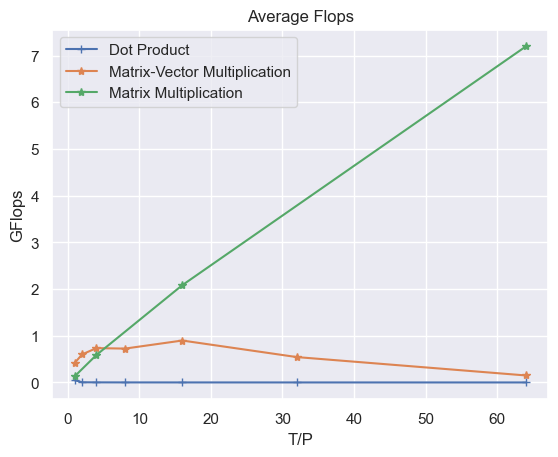

In [61]:
# average floating point operations per second (FLOPs) versus the sequential time (plot the ideal speedup on the same graph)
# three plots: one for the dot product, one for the matrix-vector product, and one for the matrix-matrix product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_dot = pd.read_csv("mpi_dot_product.csv")
dataFrame_vec = pd.read_csv("mpi_matrix_vector.csv")
dataFrame_mat = pd.read_csv("mpi_matrix_multiply.csv")

#group the data by N
groups_dot = dataFrame_dot.groupby(' P',as_index=False)[' Flops']
groups_vec = dataFrame_vec.groupby(' P',as_index=False)[' Flops']
groups_mat = dataFrame_mat.groupby(' P',as_index=False)[' Flops']

#average each group
averages_dot = groups_dot.mean()
averages_vec = groups_vec.mean()
averages_mat = groups_mat.mean()

#print(averages_mat)

flops_dot = np.array(averages_dot[" Flops"].tolist()[0:7])/(1e9)
flops_vec = np.array(averages_vec[" Flops"].tolist()[0:7])/(1e9)
flops_mat = np.array(averages_mat[" Flops"].tolist()[0:4])/(1e9)

threads_dot = np.array(averages_dot[" P"].tolist()[0:7])
threads_vec = np.array(averages_vec[" P"].tolist()[0:7])
threads_mat = np.array(averages_mat[" P"].tolist()[0:4])

#plot
plt.plot(threads_dot,flops_dot, marker='+', label = "Dot Product")
plt.plot(threads_vec,flops_vec, marker='*', label = "Matrix-Vector Multiplication")
plt.plot(threads_mat,flops_mat, marker='*', label = "Matrix Multiplication")
plt.xlabel('T/P')
plt.ylabel('GFlops')
plt.legend()
plt.title("Average Flops")
plt.show()

Text(0.5, 1.0, 'FLOPs for P=64 (MPI) and T=32 (OpenMP)')

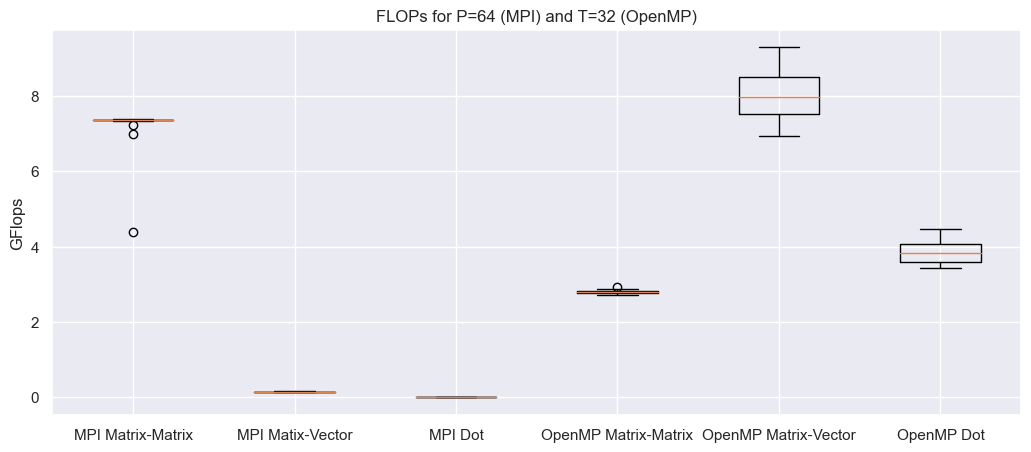

In [86]:
#box-whiskers of FLOPs for P=64 (MPI) and T=32 (OpenMP)
#6 plots: MPI matrix-matrix product, MPI matrix-vector product, MPI dot-product
#         OpenMP matrix-matrix product, OpenMP matrix-vector product, OpenMP dot-product

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()
plt.figure(figsize=(12.5, 5))

#create a dataframes
dataFrame_mpi_mat = pd.read_csv("mpi_matrix_multiply.csv")
dataFrame_mpi_vec = pd.read_csv("mpi_matrix_vector.csv")
dataFrame_mpi_dot = pd.read_csv("mpi_dot_product.csv")
dataFrame_openmp_mat = pd.read_csv("matrix_multiply_serial_naive.csv")
dataFrame_openmp_vec = pd.read_csv("matrix_vector_serial.csv")
dataFrame_openmp_dot = pd.read_csv("dot_product_serial.csv")

mpi_mat = np.array(dataFrame_mpi_mat[" Flops"].tolist()[15:35])/(1e9)
mpi_vec = np.array(dataFrame_mpi_vec[" Flops"].tolist()[30:50])/(1e9)
mpi_dot = np.array(dataFrame_mpi_dot[" Flops"].tolist()[30:50])/(1e9)
openmp_mat = np.array(dataFrame_openmp_mat["Flops"].tolist()[25:45])/(1e9)
openmp_vec = np.array(dataFrame_openmp_vec["Flops"].tolist()[25:45])/(1e9)
openmp_dot = np.array(dataFrame_openmp_dot["Flops"].tolist()[25:45])/(1e9)

names = ['MPI Matrix-Matrix','MPI Matix-Vector','MPI Dot','OpenMP Matrix-Matrix','OpenMP Matrix-Vector','OpenMP Dot']
plt.boxplot([mpi_mat,mpi_vec,mpi_dot,openmp_mat,openmp_vec,openmp_dot],labels=names)
plt.ylabel('GFlops')
plt.title("FLOPs for P=64 (MPI) and T=32 (OpenMP)")

## 4. Other MPI Accelerations
### Required SLURM Batch Submissions:
* solve your chosen problem (same as OpenMP) for $P=1,32,64$
* choose one:
    * parallel sort (5 each), $P=1,2,4,8,16,32,64$
    * Cannon's algorithm: (5 each) $P=4,16$; (20 times) $P=64$

**Code and Datasets:** link your datasets here with a couple word description of each:
* [example link](serial_sort.c)
* 

**4.1 DELIVERABLE:** Describe what problem you chose and how you accelerated it using MPI; how does this differ from the OpenMP version? Prove that the parallel version is thread safe (same answer as non-threaded) and show the parallel speedup. 

Discuss your problem with another group and describe their problem in a few sentences, and which group (by name of team members). 

**Discussion of problem and MPI vs. OpenMP:**

**Discussion with another group:**

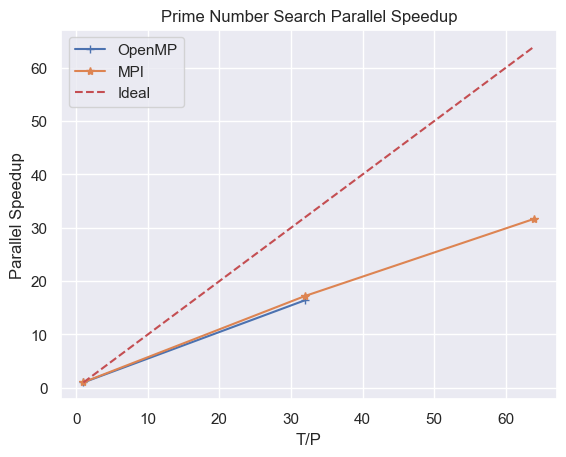

In [93]:
#plot or present any supporting evidence of your MPI acceleration (vs sequential and OpenMP)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#create a dataframe
dataFrame_openmp = pd.read_csv("prime_omp.csv")
dataFrame_mpi = pd.read_csv("prime_mpi.csv")

#group the data by N
groups_openmp = dataFrame_openmp.groupby('T',as_index=False)['s']
groups_mpi = dataFrame_mpi.groupby('P',as_index=False)['s']

#average each group
averages_openmp = groups_openmp.mean()
averages_mpi = groups_mpi.mean()

#print(averages_openmp)

seq_openmp = np.array(averages_openmp["s"].tolist()[0:1])
par_openmp = np.array(averages_openmp["s"].tolist()[0:2])
seq_mpi = np.array(averages_mpi["s"].tolist()[0:1])
par_mpi = np.array(averages_mpi["s"].tolist()[0:3])

ps_openmp = seq_openmp/par_openmp
threads_openmp = np.array(averages_openmp["T"].tolist()[0:2])

ps_mpi = seq_openmp/par_mpi
threads_mpi = np.array(averages_mpi["P"].tolist()[0:3])

#plot
plt.plot(threads_openmp,ps_openmp, marker='+', label = "OpenMP")
plt.plot(threads_mpi,ps_mpi, marker='*', label = "MPI")
plt.plot(threads_mpi,threads_mpi, 'r--', label = "Ideal")
plt.xlabel('T/P')
plt.ylabel('Parallel Speedup')
plt.legend()
plt.title("Prime Number Search Parallel Speedup")
plt.show()

**4.2 DELIVERABLE** ***only perform the deliverable that goes with your chosen problem***

#### Parallel Sort: 
1. Plot average parallel speedup vs. P (include the ideal speedup)
2. Plot average execution time vs. P

Discuss the scaling of this algorithm in a few sentences. Describe how you parallelized the sort. If you have time, you may also want to fix $P$ and vary $N$ to see how the algorithm scales as $\mathcal{O}(N)$. Bonus points may be in order. 

**Discussion:**

In [ ]:
# Plot average parallel speedup vs. P (include the ideal speedup)

In [ ]:
# Plot average execution time vs. P

**4.2 DELIVERABLE** ***only perform the deliverable that goes with your chosen problem***

#### Cannon's Algorithm:
Compare the performance of Cannon's to the other MPI implementation and OpenMP. Create two figures that have $P$ on the x-axis (including $T=1$), and on the y-axis:
1. average parallel speedup versus the sequential time (plot the ideal speedup on the same graph)
2. average floating point operations per second (FLOPs)

Each figure should have three plots: one for OpenMP, one for original MPI, and one for Cannon's. Add a legend that clearly identifies which plot is which. 

Create a box-whiskers plot that shows the FLOPs performance compared between the three matrix multiply implementations. Discuss the results.

**Discussion:**

In [ ]:
# average parallel speedup (plot the ideal speedup on the same graph)
# three plots: one for OpenMP, one for original MPI, and one for Cannon's

In [ ]:
# average FLOPs (plot the ideal speedup on the same graph)
# three plots: one for OpenMP, one for original MPI, and one for Cannon's

In [ ]:
# box-whiskers plot of FLOPs
# three plots: OpenMP, MPI original, Cannon's